In [9]:
try:
    import numpy as np
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e

try:
    from PIL import Image
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    import os
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    from os import path
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    import random
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    import matplotlib.pyplot as plt
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    from wordcloud import WordCloud, STOPWORDS
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    from sklearn.feature_extraction import stop_words
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e    

%matplotlib inline

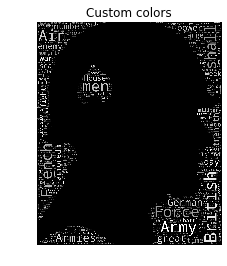

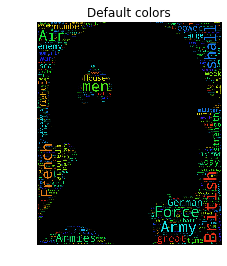

In [13]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

d = path.dirname('../examples/soldier.png')

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "soldier.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open("../examples/churchill_weshallfightonthebeaches.txt").read()

# preprocessing the text a little bit
#text = text.replace("HAN", "Han")
#text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
newstop = set([l for l in stop_words.ENGLISH_STOP_WORDS])
stopwords = newstop

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))

# create a folder to store data
if not os.path.exists('./notebookoutput'):
    os.makedirs('./notebookoutput')

wc.to_file("./notebookoutput/churchill_speech.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors)
plt.axis("off")
plt.show()